<a href="https://colab.research.google.com/github/hello-sir94/-Loan-Eligibility-Prediction/blob/main/Loan_Eligibility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **READ THE DATA**

In [3]:
loan_test=pd.read_csv('/content/loan-test.csv')
loan_train=pd.read_csv('/content/loan-train.csv')

In [4]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
print('columns:',len(loan_train.columns))

columns: 13


In [7]:
print('row:',len(loan_train))

row: 614


In [8]:
loan_test.shape

(367, 12)

In [9]:
loan_train.shape

(614, 13)

In [10]:
loan_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [11]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
loan_train_columns=loan_train.columns

In [13]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
loan_train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# **Exploratory Data Analysis**

In [16]:
def explore_object_type(df ,feature_name):

    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [17]:
explore_object_type(loan_train, 'Gender')

Gender
Male      489
Female    112
Name: count, dtype: int64


In [18]:
for featureName in loan_train_columns:
    if loan_train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s ' 'Values with count are :')
        explore_object_type(loan_train, str(featureName))


"Loan_ID's Values with count are :
Loan_ID
LP002990    1
LP001002    1
LP001003    1
LP001005    1
LP001006    1
           ..
LP001024    1
LP001020    1
LP001018    1
LP001014    1
LP001013    1
Name: count, Length: 614, dtype: int64

"Gender's Values with count are :
Gender
Male      489
Female    112
Name: count, dtype: int64

"Married's Values with count are :
Married
Yes    398
No     213
Name: count, dtype: int64

"Dependents's Values with count are :
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

"Education's Values with count are :
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

"Self_Employed's Values with count are :
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

"Property_Area's Values with count are :
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

"Loan_Status's Values with count are :
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [19]:
import missingno as msno

In [20]:
loan_train
loan_train.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<Axes: >

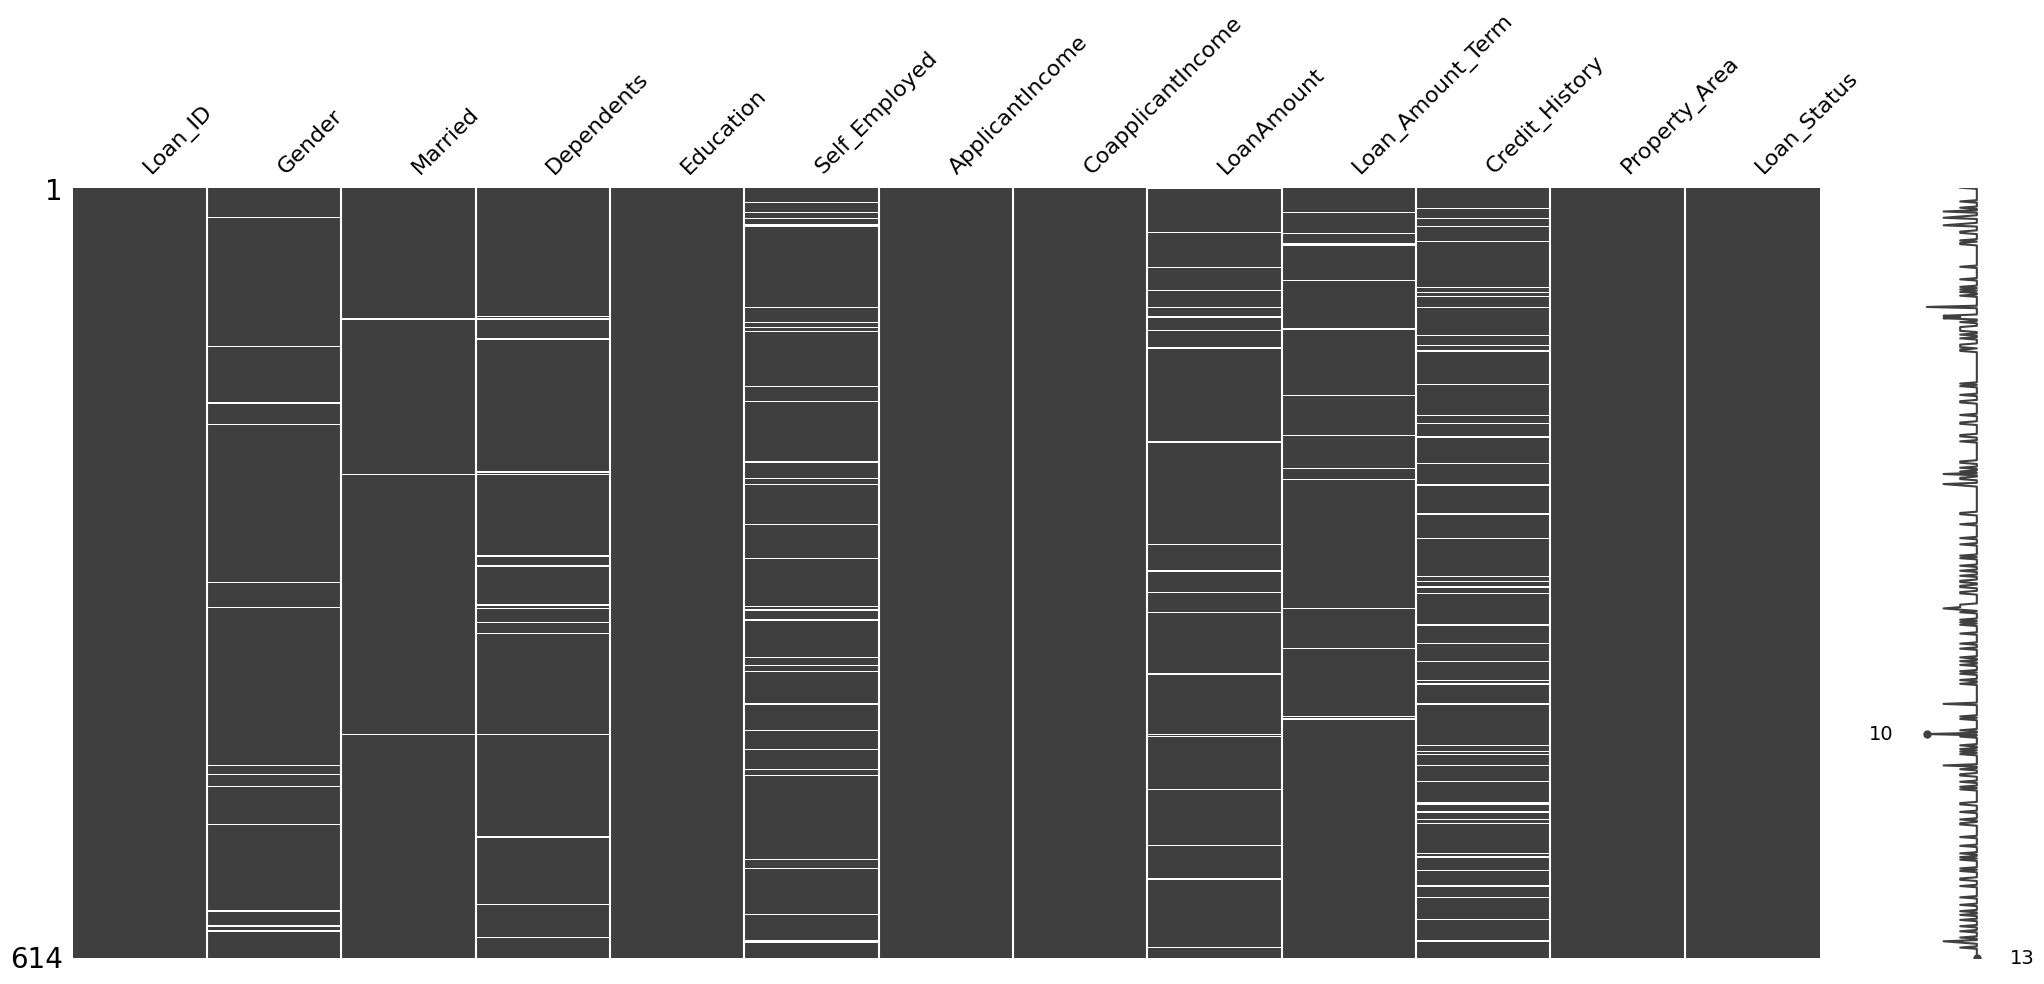

In [21]:
msno.matrix(loan_train)

<Axes: >

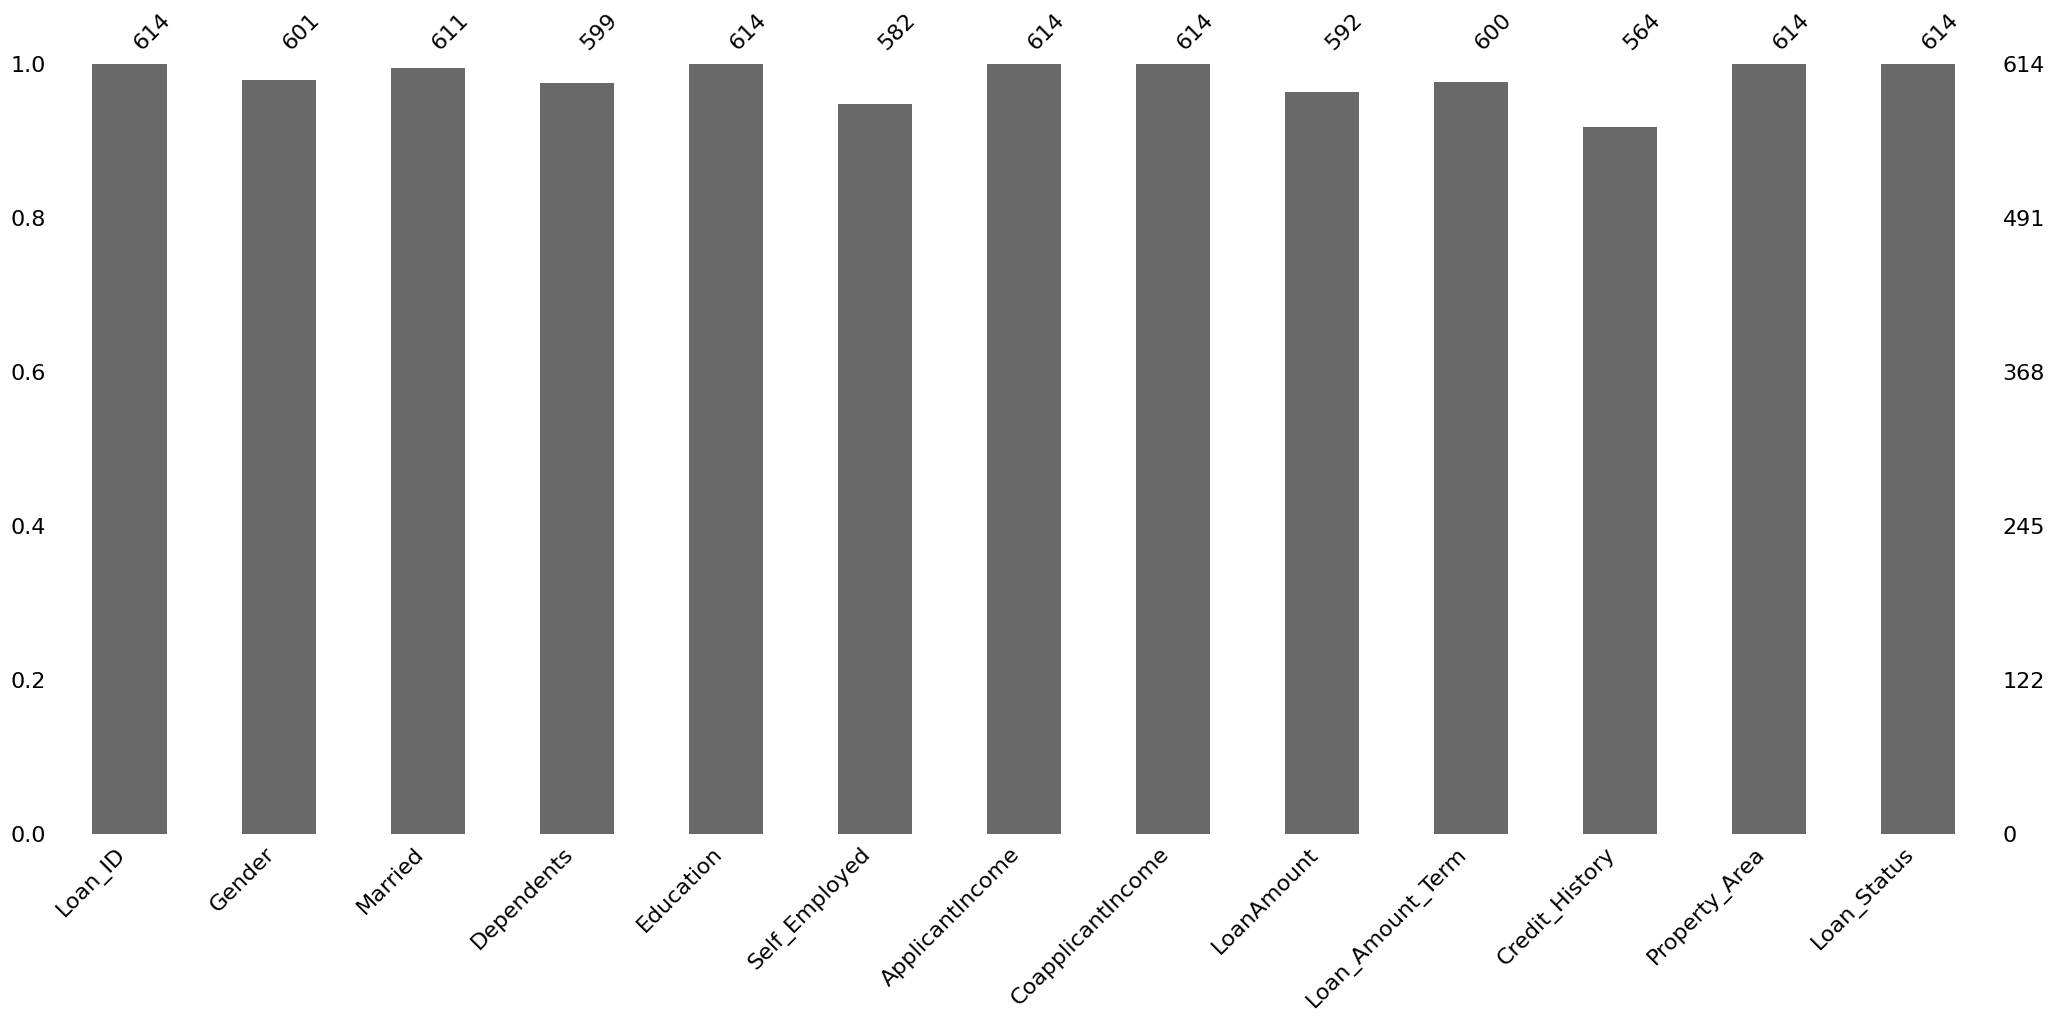

In [22]:
msno.bar(loan_train)

<Axes: >

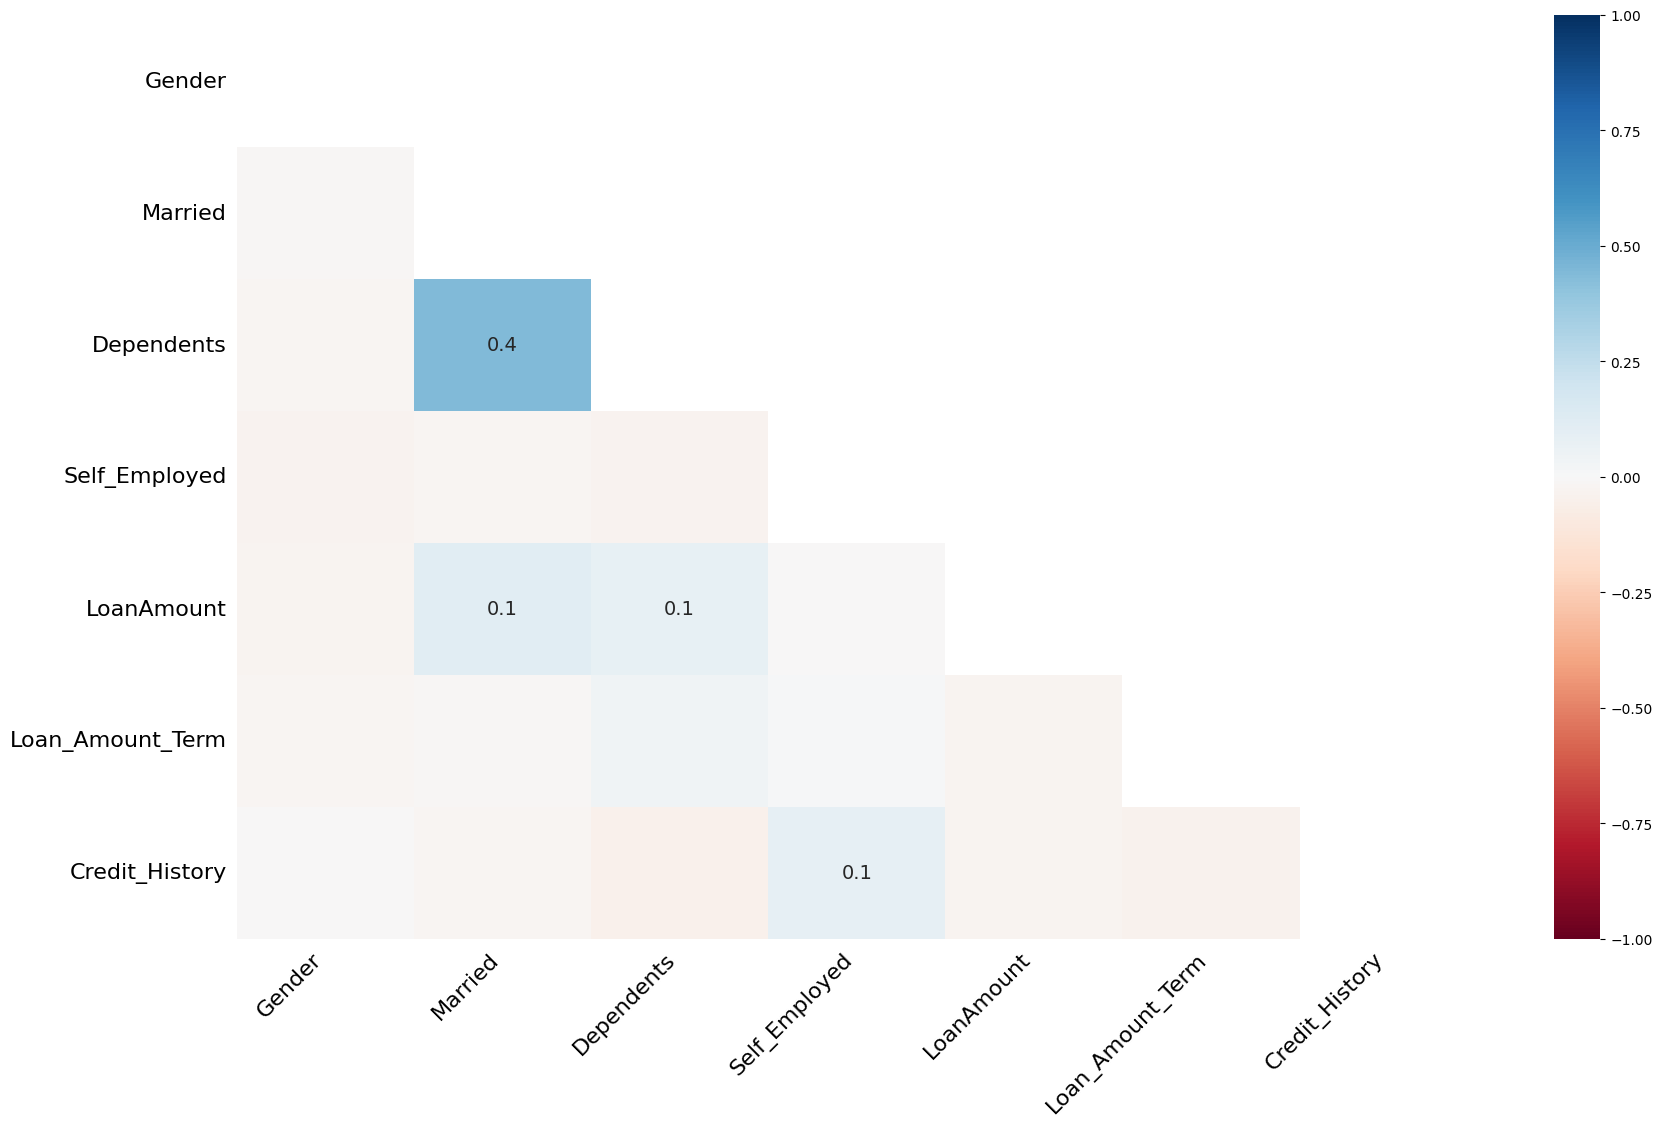

In [23]:
msno.heatmap(loan_train)

In [24]:
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(),inplace =True )
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mean(),inplace =True)

<ipython-input-24-2655299a3d6d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(),inplace =True )
<ipython-input-24-2655299a3d6d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

In [25]:
loan_train.Loan_Status=loan_train.Loan_Status.replace({'Y':1,'N':0})
#loan_test.Loan_Status=loan_test.Loan_Status.replace({'Y':1,'N':0})

loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
loan_test.Gender = loan_test.Gender.replace({"Male": 1, "Female" : 0})

loan_train.Married = loan_train.Married.replace({"Yes" : 1, "No" : 0})
loan_test.Married = loan_test.Married.replace({"Yes" : 1, "No" : 0})

loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes":1,"No":0})
loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes":1,"No":0})

loan_train.LoanAmount = loan_train.LoanAmount.replace({"NaN":0})
loan_test.LoanAmount = loan_test.LoanAmount.replace({"NaN":0})

<ipython-input-25-201e4399b25e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_train.Loan_Status=loan_train.Loan_Status.replace({'Y':1,'N':0})
<ipython-input-25-201e4399b25e>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
<ipython-input-25-201e4399b25e>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to 

In [26]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0],inplace= True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0],inplace= True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0],inplace =True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0],inplace =True)

loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0],inplace =True)
loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0],inplace =True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0],inplace =True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0],inplace =True)

loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(),inplace =True)
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(),inplace =True)

loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mean(),inplace= True)
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mean(),inplace = True)

<ipython-input-26-5c730407aef7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_train['Gender'].fillna(loan_train['Gender'].mode()[0],inplace= True)
<ipython-input-26-5c730407aef7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [27]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])
    loan_test[col] = le.fit_transform(loan_test[col])

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set_style('dark')

In [29]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,0,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1.0,1.0,3,0,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,0,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,0,0.0,7583,0.0,187.000000,360.0,1.0,2,1


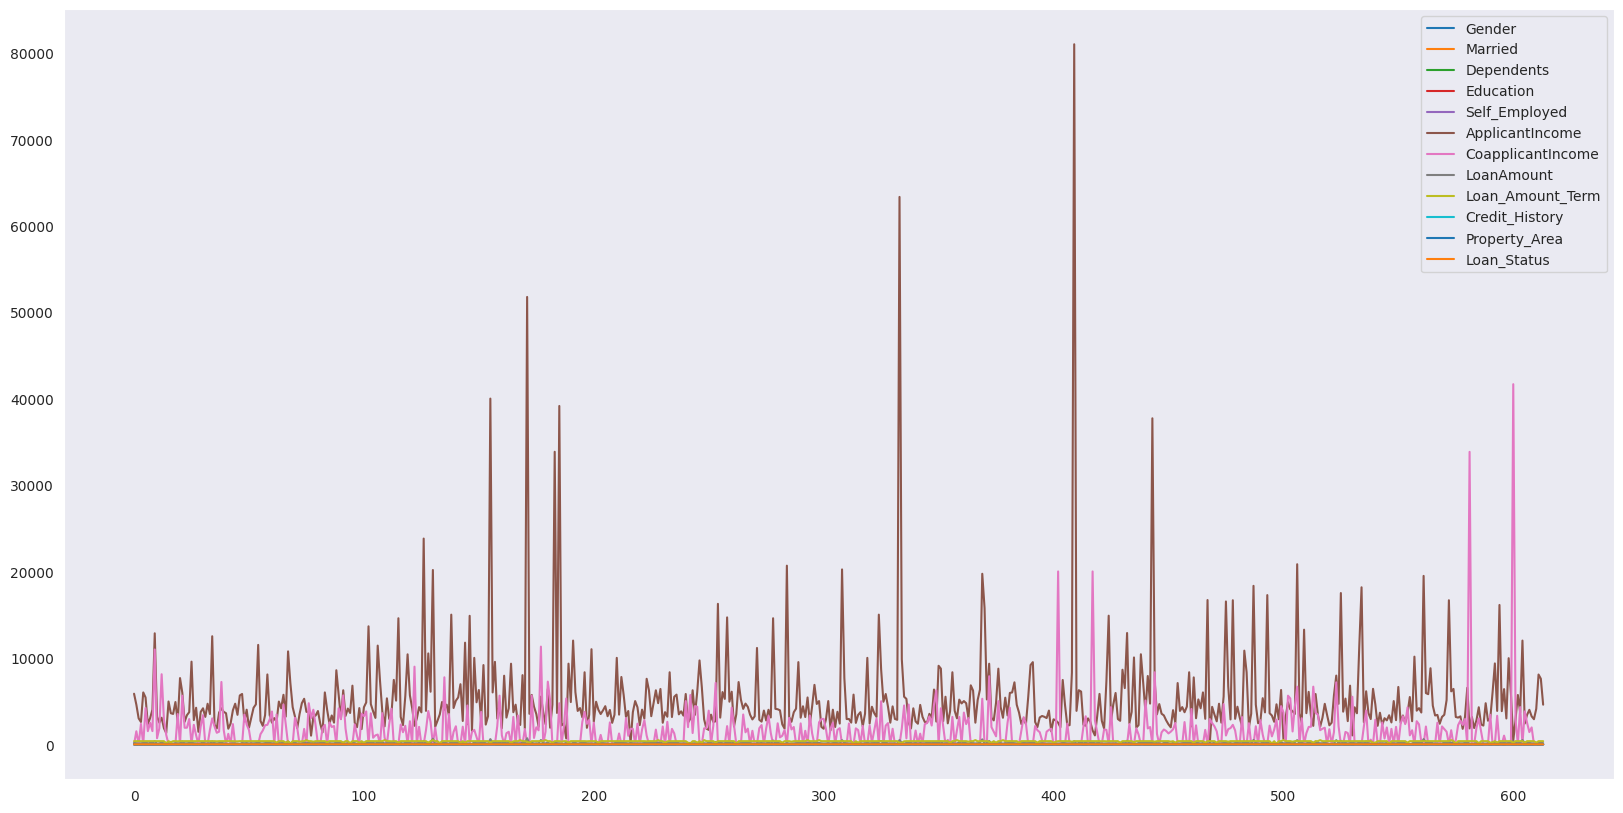

In [30]:
loan_train.plot(figsize= (20,10))
plt.show()

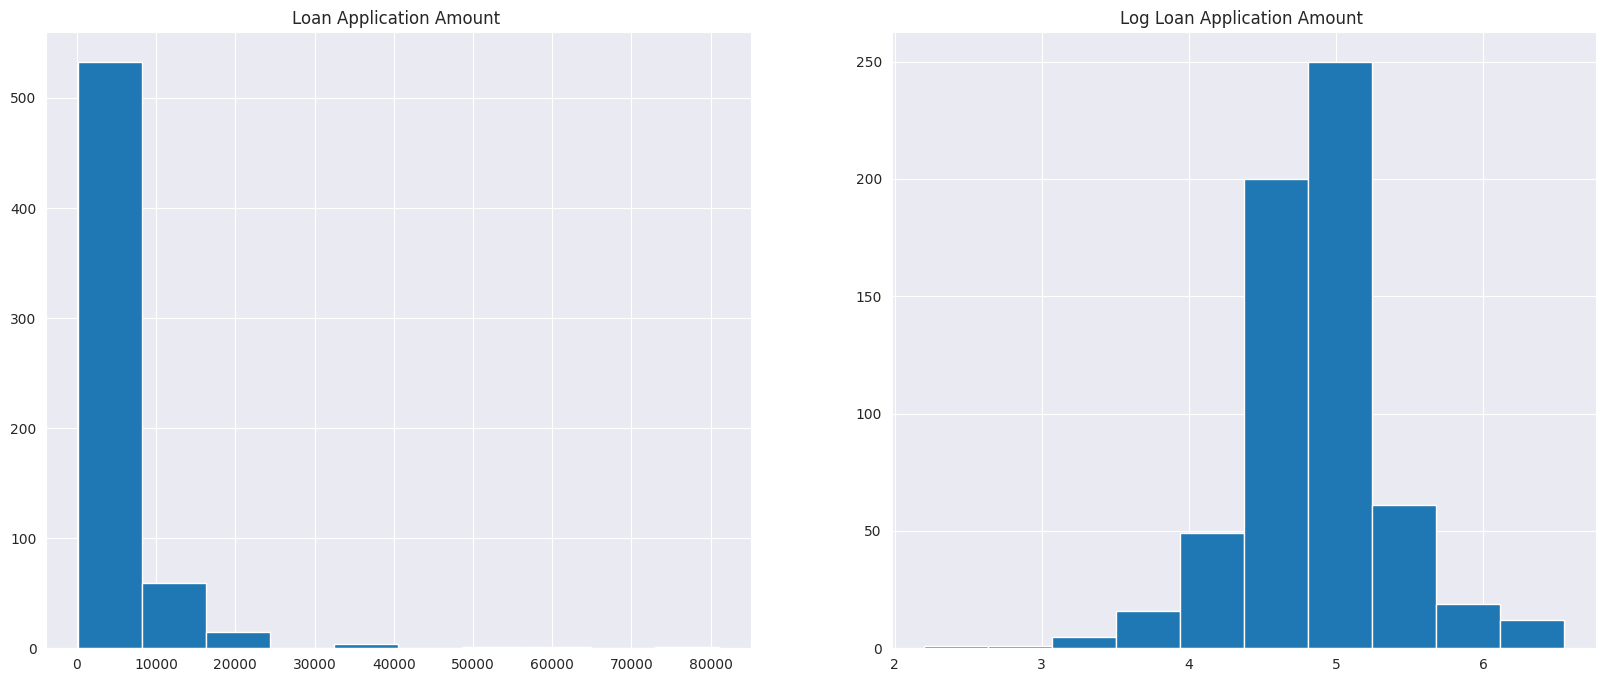

In [31]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)


loan_train['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(loan_train['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

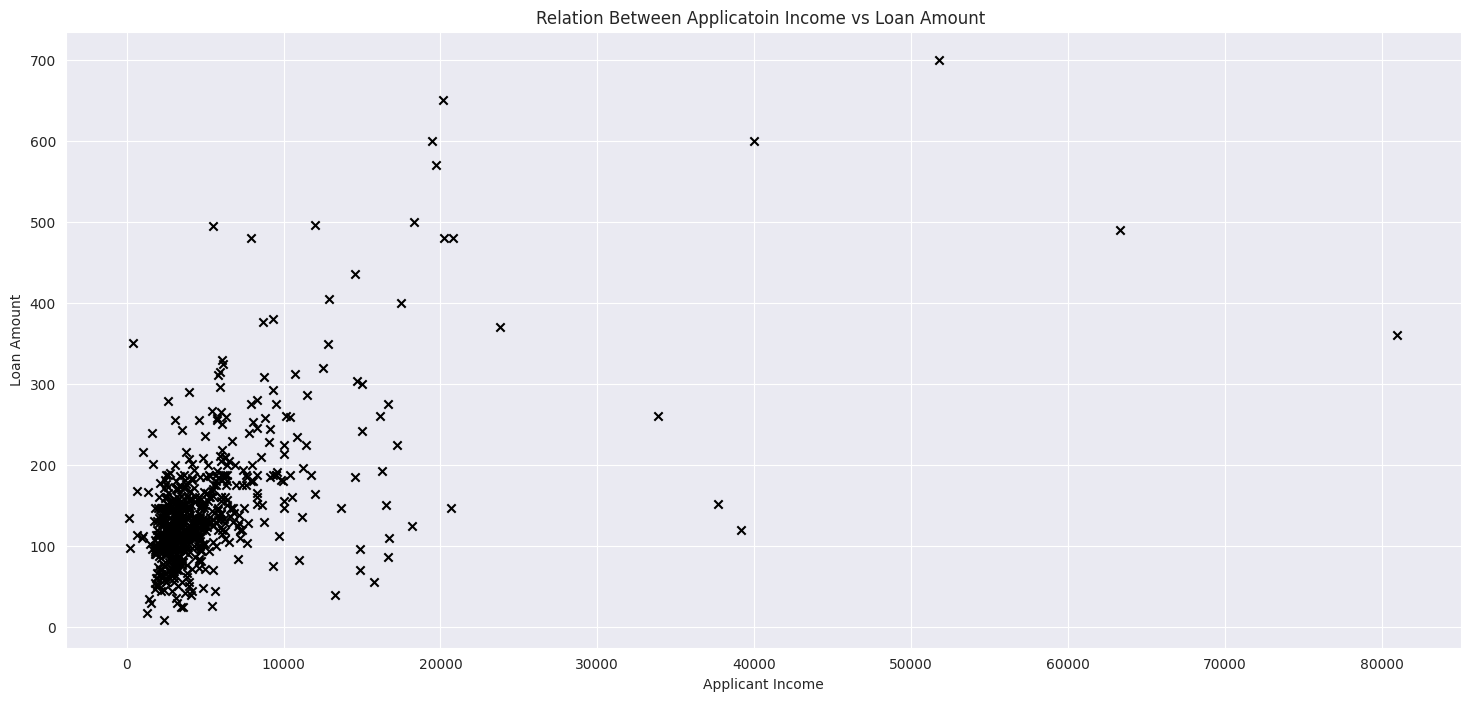

In [32]:
plt.figure(figsize=(18, 8))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(loan_train['ApplicantIncome'] , loan_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

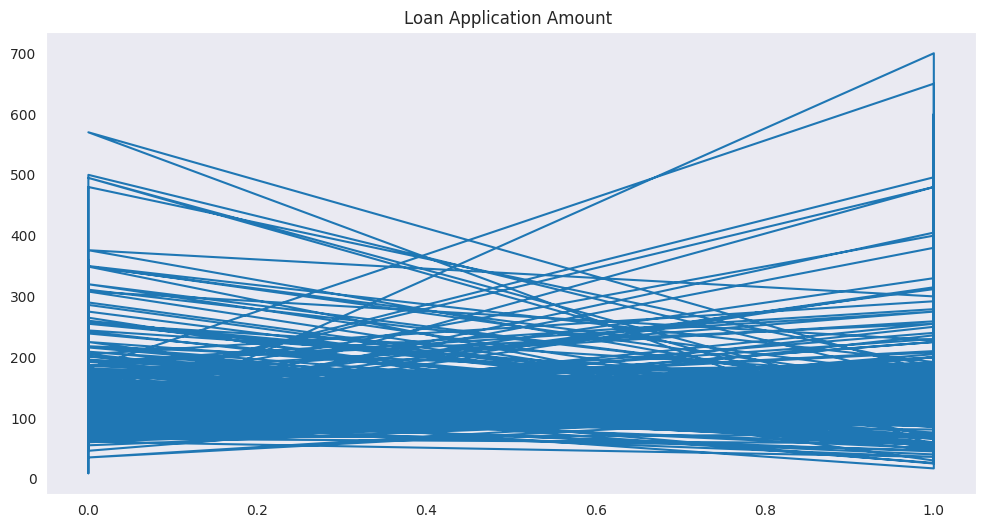

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(loan_train['Loan_Status'], loan_train['LoanAmount'])
plt.title("Loan Application Amount ")
plt.show()

In [34]:
df = loan_train.drop(columns=['Loan_ID'])

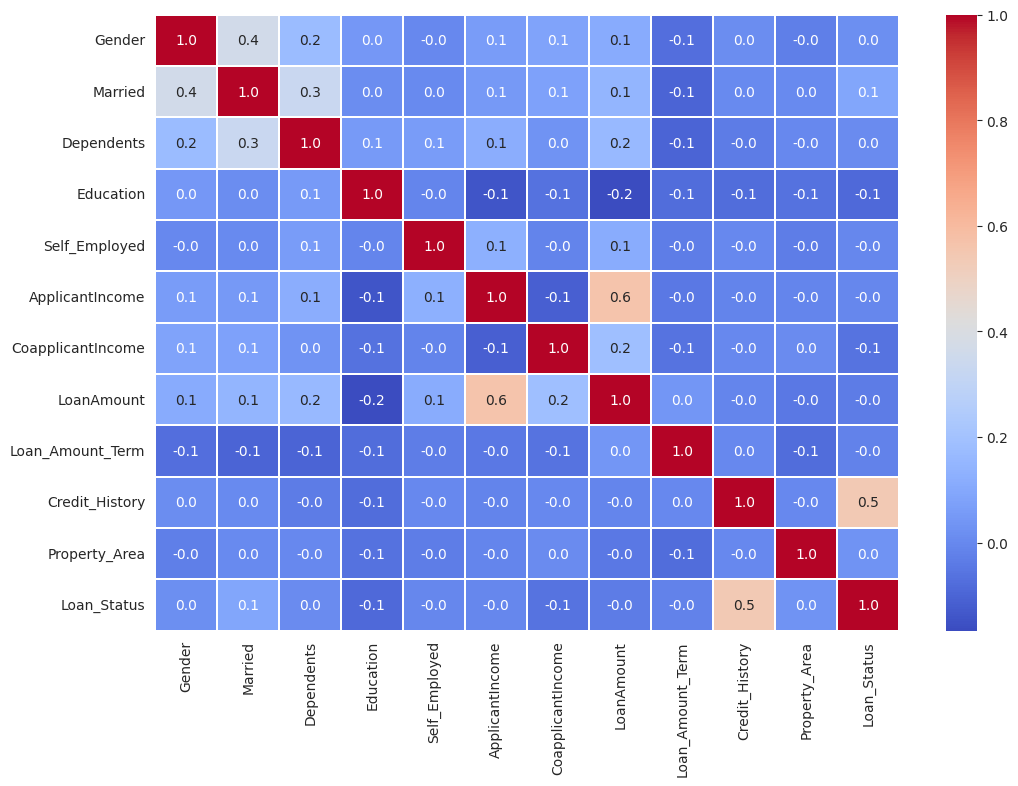

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

# **Choose ML Model**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
logistic_model = LogisticRegression()

# **TRAINING THE ML MODEL**

In [38]:
train_features = ['Credit_History', 'Education', 'Gender']

x_train = loan_train[train_features].values
y_train = loan_train['Loan_Status'].values

x_test = loan_test[train_features].values

In [39]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

# **PREDICT MODEL**

In [40]:
predicted = logistic_model.predict(x_test)

In [41]:
print('Coefficient of model :', logistic_model.coef_)

Coefficient of model : [[ 3.31878675 -0.30571091  0.09329487]]


In [42]:
print('Intercept of model',logistic_model.intercept_)

Intercept of model [-1.98543511]


In [43]:
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


In [44]:
predict_test = logistic_model.predict(x_test)
print('Target on test data',predict_test)

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
